## Car Data Segmentation with Hierarchical Clustering Analysis

### Importing libraries


In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy
import numpy as np

### Importing Data Set

In [4]:
df = pd.read_csv('/kaggle/input/car-model-dataset/mtcars.csv')

**display dataset**

In [5]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
df.shape

(32, 12)

**data types of dataset**

In [7]:
df.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

**Check for Null Values**

In [8]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64


**check total missing values**

In [9]:
# Total missing values in the dataset
total_missing = df.isnull().sum().sum()

print(f"Total Missing Values in the Dataset: {total_missing}")

Total Missing Values in the Dataset: 0


**Display Unique Values for Each Column**

In [10]:
# Loop through each column and print the unique values
for column in df.columns:
    unique_values = df[column].unique()
    count_values  = len(df[column].unique())
    print(f"Column: {column}")
    print(f"Unique Values: {unique_values}\n")
    print(f"total count unique values : { count_values}\n")

Column: model
Unique Values: ['Mazda RX4' 'Mazda RX4 Wag' 'Datsun 710' 'Hornet 4 Drive'
 'Hornet Sportabout' 'Valiant' 'Duster 360' 'Merc 240D' 'Merc 230'
 'Merc 280' 'Merc 280C' 'Merc 450SE' 'Merc 450SL' 'Merc 450SLC'
 'Cadillac Fleetwood' 'Lincoln Continental' 'Chrysler Imperial' 'Fiat 128'
 'Honda Civic' 'Toyota Corolla' 'Toyota Corona' 'Dodge Challenger'
 'AMC Javelin' 'Camaro Z28' 'Pontiac Firebird' 'Fiat X1-9' 'Porsche 914-2'
 'Lotus Europa' 'Ford Pantera L' 'Ferrari Dino' 'Maserati Bora'
 'Volvo 142E']

total count unique values : 32

Column: mpg
Unique Values: [21.  22.8 21.4 18.7 18.1 14.3 24.4 19.2 17.8 16.4 17.3 15.2 10.4 14.7
 32.4 30.4 33.9 21.5 15.5 13.3 27.3 26.  15.8 19.7 15. ]

total count unique values : 25

Column: cyl
Unique Values: [6 4 8]

total count unique values : 3

Column: disp
Unique Values: [160.  108.  258.  360.  225.  146.7 140.8 167.6 275.8 472.  460.  440.
  78.7  75.7  71.1 120.1 318.  304.  350.  400.   79.  120.3  95.1 351.
 145.  301.  121. ]

tota

In [11]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


**The decision of the actual variable and the actual variable remove or not**

The decision of whether to remove actual variables (also known as features) before applying hierarchical clustering depends on several factors, including the nature of the data, the clustering objective, and the specific hierarchical clustering algorithm being used .

if you want to cluster based on the number of cylinders (cyl column) in the car dataset, you can treat this as the actual variable.in this project , we are not remove actual variable.

In [12]:
Y = df['cyl']

In [13]:
Y.value_counts()

cyl
8    14
4    11
6     7
Name: count, dtype: int64

**model column make as index of dataset**

In [14]:
df = df.set_index('model')

In [15]:
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


**Agglomerative Clustering**

Agglomerative Clustering is a type of hierarchical clustering that merges clusters based on some similarity measure, building a tree-like structure.

- Complete-Linkage Clustering
- Average-Linkage Clustering
- Ward's Method (or Ward Linkage)

**Complete-Linkage Clustering**

Merges clusters based on the maximum distance between any pair of data points from two clusters.

In [16]:
# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'complete')

In [17]:
Z

array([[  0.        ,   1.        ,   0.61532512,   2.        ],
       [ 11.        ,  12.        ,   0.98264948,   2.        ],
       [  9.        ,  10.        ,   1.52315462,   2.        ],
       [ 13.        ,  33.        ,   2.13834048,   3.        ],
       [ 17.        ,  25.        ,   5.14734155,   2.        ],
       [ 20.        ,  26.        ,   8.6535903 ,   2.        ],
       [  6.        ,  23.        ,  10.07612029,   2.        ],
       [ 19.        ,  36.        ,  10.3922856 ,   3.        ],
       [  2.        ,  37.        ,  13.13571087,   3.        ],
       [ 21.        ,  22.        ,  14.01549946,   2.        ],
       [ 18.        ,  39.        ,  14.78070702,   4.        ],
       [ 14.        ,  15.        ,  15.62244462,   2.        ],
       [ 32.        ,  34.        ,  15.67247268,   4.        ],
       [ 31.        ,  40.        ,  20.69394356,   4.        ],
       [ 28.        ,  38.        ,  21.26559898,   3.        ],
       [  8.        ,  45

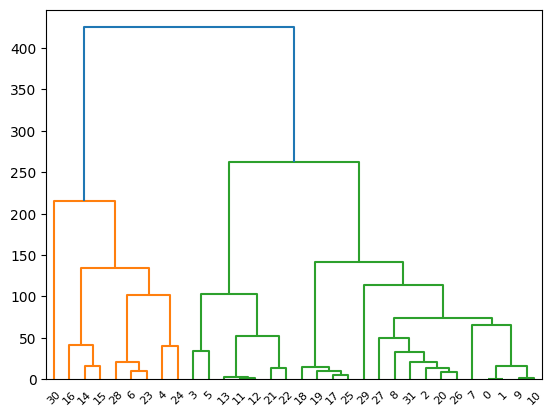

In [18]:
hierarchy.dendrogram(Z, leaf_font_size=8)
plt.show()

Above figure shows a simple dendogram without proper labels shown. Let us explore further and see how customizations can be made to improve the plot.

## 2. Adding leaf labels

In [19]:
df.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [20]:
Z = hierarchy.linkage(df, 'complete')

**Task 1:** Make a dendogram for improving the leaf rotation, font size of labels. Keep in mind the following:

- leaf_rotation = 90
- leaf_font_size= 10
- labels=df.index

In [21]:
df.index

Index(['Mazda RX4', 'Mazda RX4 Wag', 'Datsun 710', 'Hornet 4 Drive',
       'Hornet Sportabout', 'Valiant', 'Duster 360', 'Merc 240D', 'Merc 230',
       'Merc 280', 'Merc 280C', 'Merc 450SE', 'Merc 450SL', 'Merc 450SLC',
       'Cadillac Fleetwood', 'Lincoln Continental', 'Chrysler Imperial',
       'Fiat 128', 'Honda Civic', 'Toyota Corolla', 'Toyota Corona',
       'Dodge Challenger', 'AMC Javelin', 'Camaro Z28', 'Pontiac Firebird',
       'Fiat X1-9', 'Porsche 914-2', 'Lotus Europa', 'Ford Pantera L',
       'Ferrari Dino', 'Maserati Bora', 'Volvo 142E'],
      dtype='object', name='model')

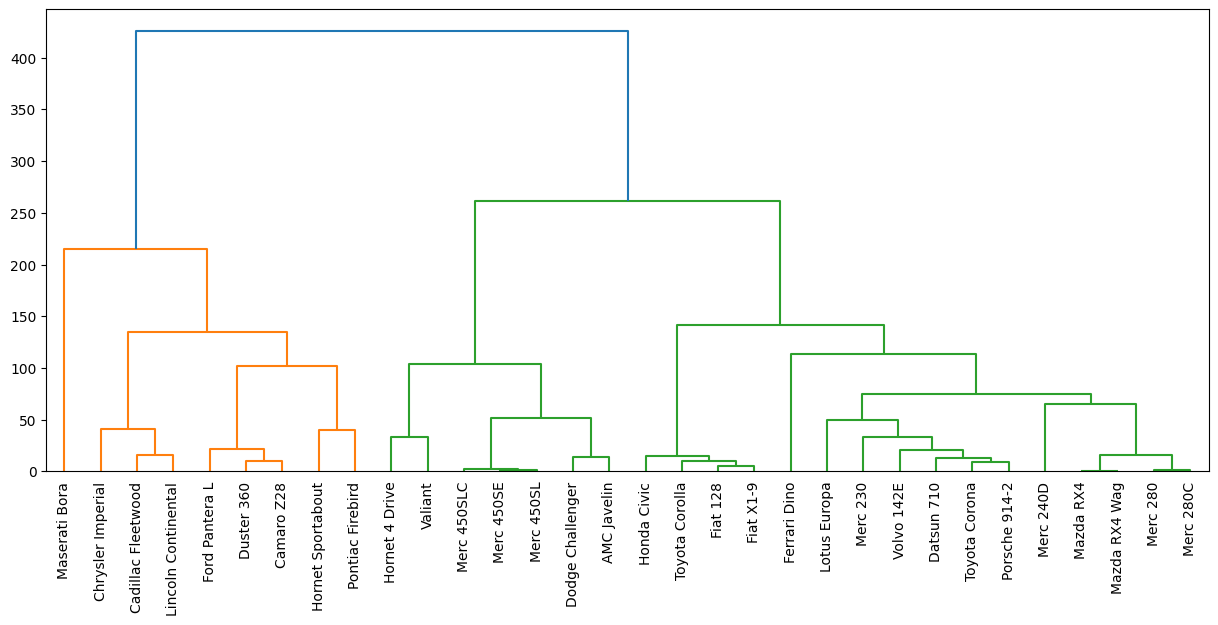

In [22]:
# Plot with Custom leaves
plt.figure(figsize=(15,6))
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=10, labels=df.index)
plt.show()

The above plot shows labels and names of different models, those which are adjusted to get a better understanding of the dendogram. We can further improve the visualization by changing the orientation of these labels.

## 3. Orientation

**Task 2:**: Fix the orientation of dendogram above by putting the orientation = "left". Please note that the lable font size should be 10

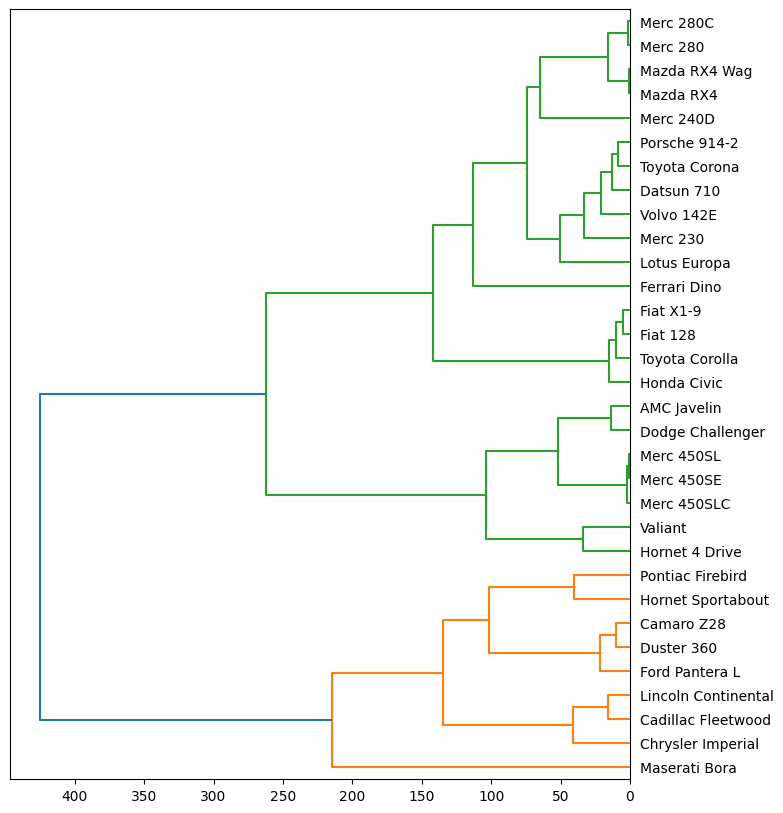

In [23]:
# Orientation of the dendrogram
plt.figure(figsize=(8,10))
hierarchy.dendrogram(Z, orientation="left",leaf_font_size=10, labels=df.index)
plt.show()

The plot above shows how the orientation of the plot and labels can be changed. The orientation in the plot above has been made to right and can also be set to left.

## 4. Number of clusters

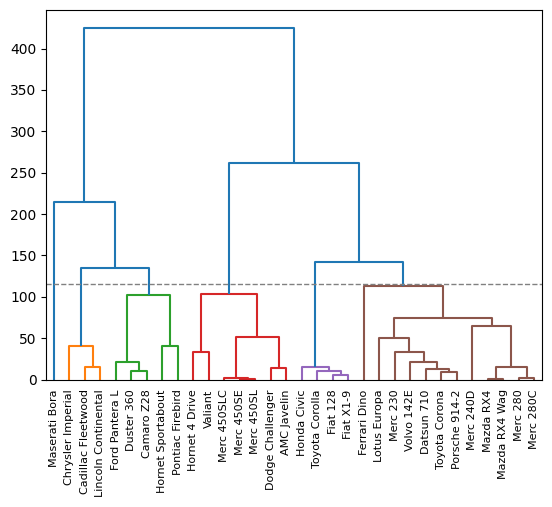

In [24]:
# Control number of clusters in the plot + add horizontal line.
hierarchy.dendrogram(Z, color_threshold=115,labels=df.index,leaf_rotation=90)
plt.axhline(y=115, c='grey', lw=1, linestyle='dashed')

A horizontal shows the threshold from where the clusters can be identified. Currently there are 3 clusters shown. Changing the threshold would result in different number of clusters.

**Average-Linkage Clustering , complete linkage and Ward's Method (or Ward Linkage) using sklearn**

Use sklearn's ```AgglomerativeClustering``` to conduct the heirarchical clustering

In [25]:
from sklearn.cluster import AgglomerativeClustering

- complete linkage using sklearn

In [26]:
#Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
complete = AgglomerativeClustering(n_clusters=3, linkage="complete")

#Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
complete_pred = complete.fit_predict(df)

In [27]:
complete_pred

array([1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1])

- average linkage using sklearn

In [28]:
# Hierarchical clustering using average linkage
# # Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
avg = AgglomerativeClustering(n_clusters=3, linkage="average")

# Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
avg_pred = avg.fit_predict(df)

In [29]:
avg_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 2, 1])

 - Ward's Method (or Ward Linkage) using sklearn

In [30]:
# # Write the code to create an instance of AgglomerativeClustering with the appropriate parameters
ward = AgglomerativeClustering(n_clusters=3)

# Fit & predict
# # Write a code to make AgglomerativeClustering fit the dataset and predict the cluster labels
ward_pred = ward.fit_predict(df)

In [31]:
ward_pred

array([1, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       2, 0, 0, 1, 1, 1, 0, 1, 0, 1])

**Adjusted Rand Index (ARI)**

The Adjusted Rand Index (ARI) or Adjusted Rand Score is a metric used to evaluate the similarity between two clusterings by comparing how closely they match.

The ARI is calculated based on the number of element pairs that are either assigned to the same or different clusters in both clusterings. It ranges from -1 to 1:

1: Perfect match between the two clusterings.

0: Random clustering or no agreement.

Negative values: Indicates worse than random agreement.

The ARI measures how well the predicted labels match the true labels(Actual Variables)while accounting for chance, giving a more reliable evaluation of clustering performance.

In [32]:
from sklearn.metrics import adjusted_rand_score

In [33]:
#Write the code to calculate the adjusted Rand score for the complete linkage clustering labels
complete_ar_score = adjusted_rand_score(Y, complete_pred)

In [34]:
# Write the code to calculate the adjusted Rand score for the average linkage clustering labels
avg_ar_score = adjusted_rand_score(Y, avg_pred)

In [35]:
# Write the code to calculate the adjusted Rand score for the Ward's Method (or Ward Linkage) clustering labels
ward_ar_score = adjusted_rand_score(Y, ward_pred)

**Which algorithm results in the higher Adjusted Rand Score?**

In [36]:
print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.4662170645525801 
Complete:  0.4662170645525801 
Average:  0.5675458157978572


The best algorithm result is average link clustering

**Compersion actual variable(truth value) and prediction display**

- actual variable

In [37]:
Y.value_counts()

cyl
8    14
4    11
6     7
Name: count, dtype: int64

- There are 14 occurrences for engines with 8 cylinders car.
- There are 11 occurrences for engines with 4 cylinders car.
- There are 7 occurrences for engines with 6 cylinders car.

**prediction variable**

To calculate unique values and their counts in a NumPy array, you can use the numpy.unique() function. This function returns the unique elements of an array and can also provide counts of each unique value

In [38]:
avg_pred

array([1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 2, 1])

In [39]:
import numpy as np

# Get unique values and their counts
unique_values, counts = np.unique(avg_pred, return_counts=True)

# Print the results
print("Unique Values:", unique_values)
#print("Counts:", counts)

Unique Values: [0 1 2]


**Contingency Table**

A contingency table, also known as a cross-tabulation or crosstab, is a statistical table that shows the frequency distribution of two or more categorical variables. It helps visualize and analyze the relationship between these variables.

In [40]:
print(Y.value_counts())

compersion = pd.crosstab(avg_pred, df["cyl"])
compersion

cyl
8    14
4    11
6     7
Name: count, dtype: int64


cyl,4,6,8
row_0,,,
0,0,2,13
1,11,5,0
2,0,0,1


**Rows and Columns:**

The rows and columns are indexed by different categories or measurements. It appears that the rows are indexed as row_0, row_1, row_2, and the columns correspond to the number of cylinders (4, 6, 8).

**In this table**:

- row_0: 

The values are [0,2,13], indicating that there are 2 occurrences for car engines with 
6-cylinders , and 13 occurrences for car engine with 8-cylinders but  none for 4 cylinders car.


- row_1: 

The values are [11,5,0], indicating that there are 11 occurrences for engines with 4 cylinders and 5 occurrences for engines with 6 cylinders, but none for 8 cylinders.


- row_2: 

The values are [0,0,1], indicating that there are 1 occurrences for car engines with 8 cylinders but none for 4 and 6  car cylinders.

**Dendrogram visualization with scipy**

Let's visualize the highest scoring clustering result. 

To do that, we'll need to use Scipy's [```linkage```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) function to perform the clusteirng again so we can obtain the linkage matrix it will later use to visualize the hierarchy.


Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values. Pick the one that resulted in the highest Adjusted Rand Score.

In [41]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

linkage_type = 'complete'

linkage_matrix = linkage(df, linkage_type)

Plot a dendogram using scipy's [dendrogram()](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.dendrogram.html) function

- leaf_font_size=10
- labels=X.index
- orientation="right"
- figsize=(15,18)

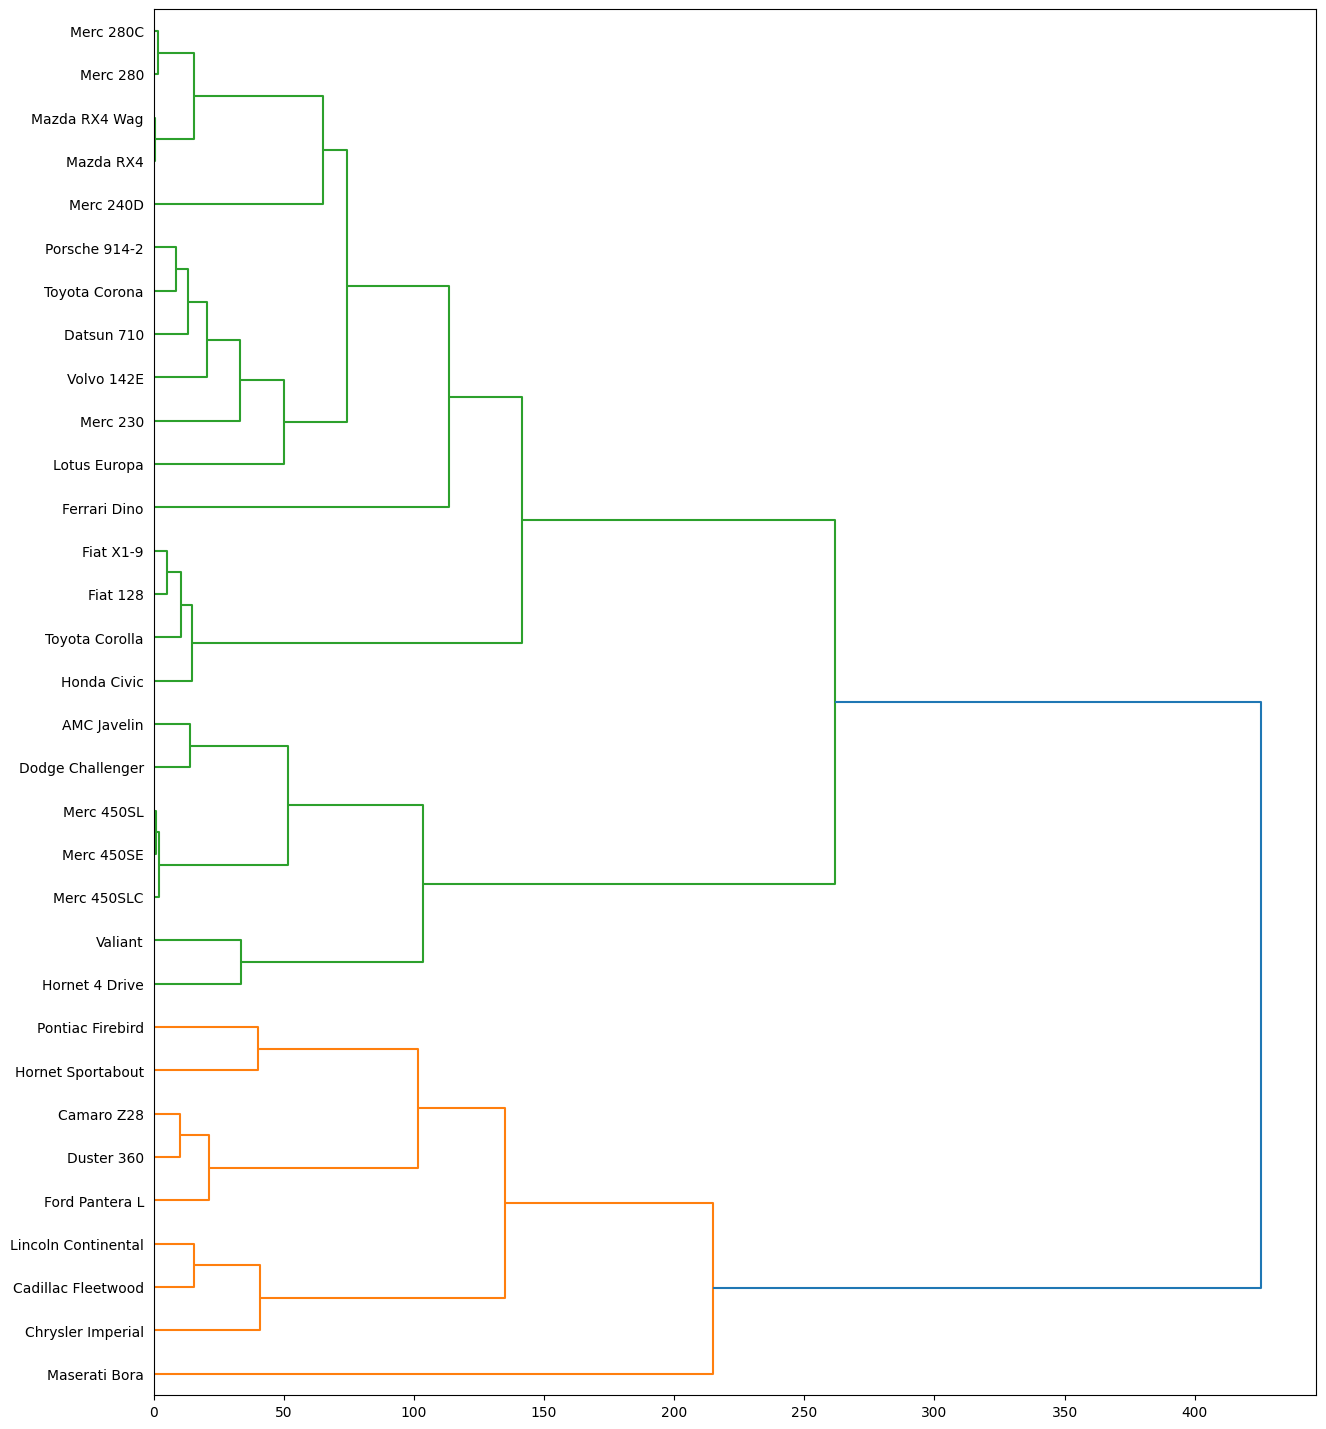

In [43]:
# write the code to plot using 'dendrogram()'

from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(15,18))

dendrogram(linkage_matrix, leaf_font_size=10, labels=df.index,orientation="right" )

plt.show()